In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Chest X-Ray dataset
base_path = r"D:\Adi's Projects\MultiModel Breast Cancer Analysis\Dataset\MultiModel Breast Cancer MSI Dataset\Chest_XRay_MSI"
categories_chest = ["Malignant", "Normal"]

# Histopathological dataset
base_path_1 = r"D:\Adi's Projects\MultiModel Breast Cancer Analysis\Dataset\MultiModel Breast Cancer MSI Dataset\Histopathological_MSI"
categories_histopath = ["benign", "malignant"]

# Ultrasound Images dataset
base_path_2 = r"D:\Adi's Projects\MultiModel Breast Cancer Analysis\Dataset\MultiModel Breast Cancer MSI Dataset\Ultrasound Images_MSI"
categories_ultrasound = ["benign", "malignant"]



In [3]:
image_paths = []
labels = []

for category in categories_chest:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

# Histopathological
image_paths = []
labels = []

for category in categories_histopath:
    category_path = os.path.join(base_path_1, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df1 = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

# Ultrasound
image_paths = []
labels = []

for category in categories_ultrasound:
    category_path = os.path.join(base_path_2, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df2 = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})


In [4]:
df

image_path      label
0    D:\Adi's Projects\MultiModel Breast Cancer Ana...  Malignant
1    D:\Adi's Projects\MultiModel Breast Cancer Ana...  Malignant
2    D:\Adi's Projects\MultiModel Breast Cancer Ana...  Malignant
3    D:\Adi's Projects\MultiModel Breast Cancer Ana...  Malignant
4    D:\Adi's Projects\MultiModel Breast Cancer Ana...  Malignant
..                                                 ...        ...
968  D:\Adi's Projects\MultiModel Breast Cancer Ana...     Normal
969  D:\Adi's Projects\MultiModel Breast Cancer Ana...     Normal
970  D:\Adi's Projects\MultiModel Breast Cancer Ana...     Normal
971  D:\Adi's Projects\MultiModel Breast Cancer Ana...     Normal
972  D:\Adi's Projects\MultiModel Breast Cancer Ana...     Normal

[973 rows x 2 columns]

In [5]:
df1

image_path      label
0     D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
1     D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
2     D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
3     D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
4     D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
...                                                 ...        ...
1241  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
1242  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
1243  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
1244  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
1245  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant

[1246 rows x 2 columns]

In [6]:
df2

image_path      label
0    D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
1    D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
2    D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
3    D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
4    D:\Adi's Projects\MultiModel Breast Cancer Ana...     benign
..                                                 ...        ...
801  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
802  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
803  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
804  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant
805  D:\Adi's Projects\MultiModel Breast Cancer Ana...  malignant

[806 rows x 2 columns]

In [7]:
df.shape

(973, 2)

In [8]:
df.columns
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  973 non-null    object
 1   label       973 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


In [11]:
df['label'].unique()
df['label'].value_counts()

label
Normal       500
Malignant    473
Name: count, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\adity\AppData\Local\Temp\ipykernel_23664\1339928207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


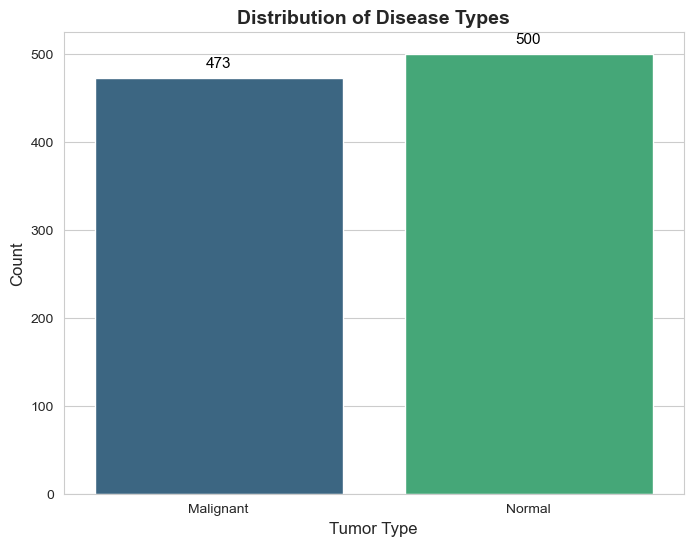

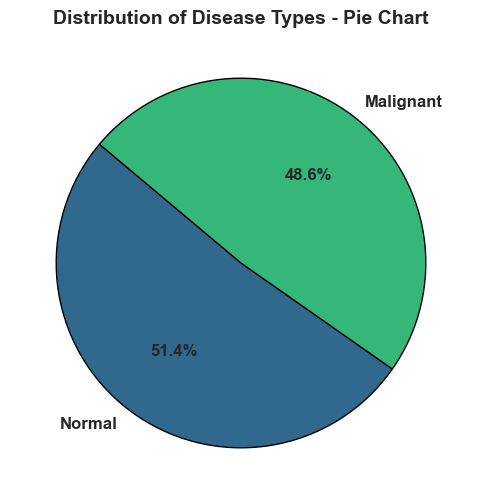

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6)) 

sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution of Disease Types", fontsize=14,
fontweight='bold')

ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14,fontweight='bold')

plt.show()

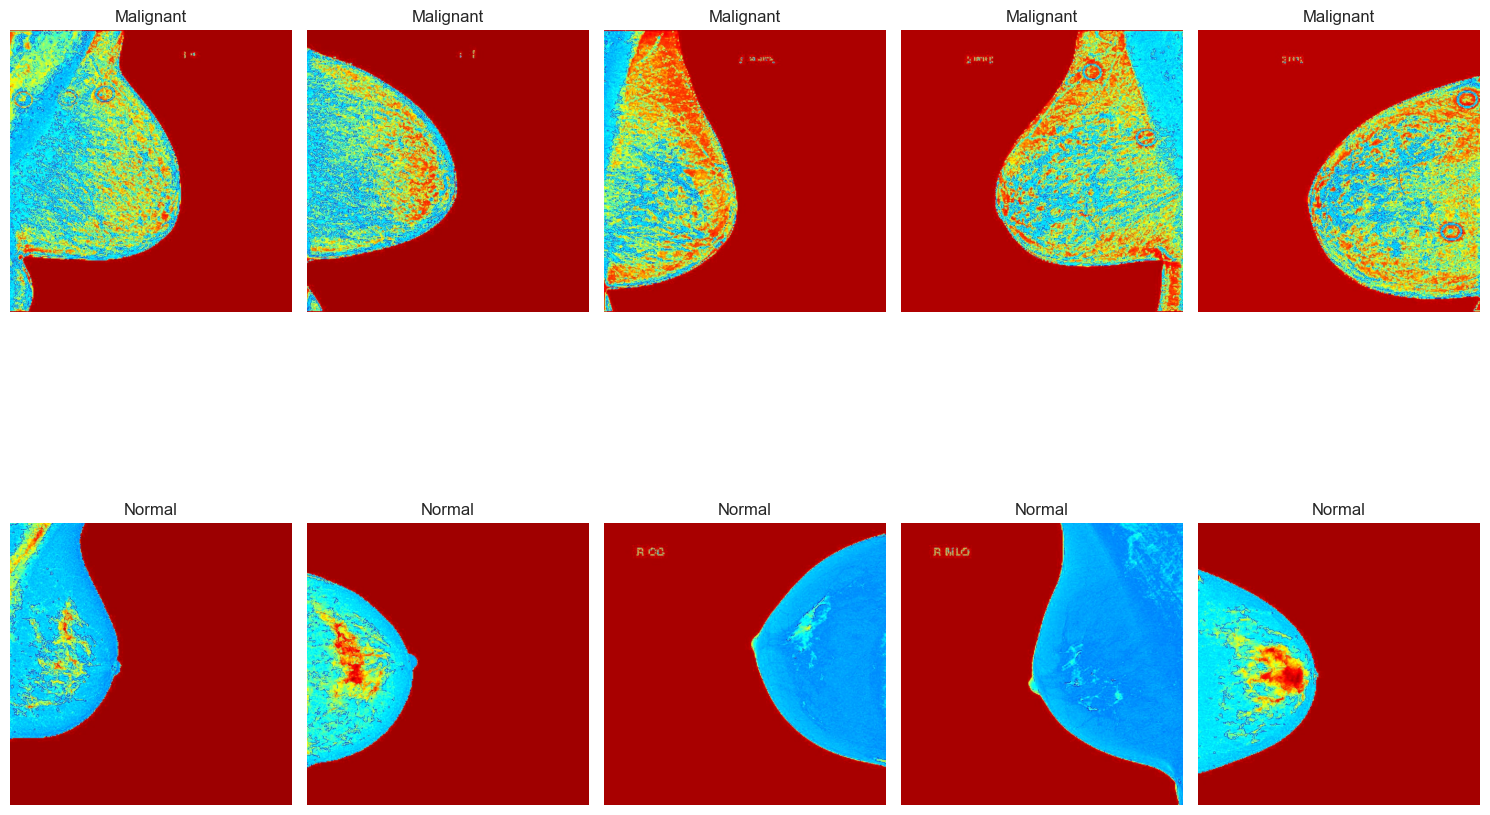

In [14]:
import cv2
import matplotlib.pyplot as plt

# Number of images to show per category
num_images = 5

# Get unique categories from the DataFrame
categories = df['label'].unique()

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    # Get top `num_images` image paths from each category
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
    
    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)

plt.tight_layout()
plt.show()

In [15]:
df1.shape

(1246, 2)

In [17]:
df1.columns
df1.duplicated().sum()

0

In [18]:
df1.isnull().sum()

image_path    0
label         0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1246 non-null   object
 1   label       1246 non-null   object
dtypes: object(2)
memory usage: 19.6+ KB


In [21]:
df1['label'].unique()
df1['label'].value_counts()

label
benign       623
malignant    623
Name: count, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\adity\AppData\Local\Temp\ipykernel_23664\1062716680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="label", palette="viridis", ax=ax)


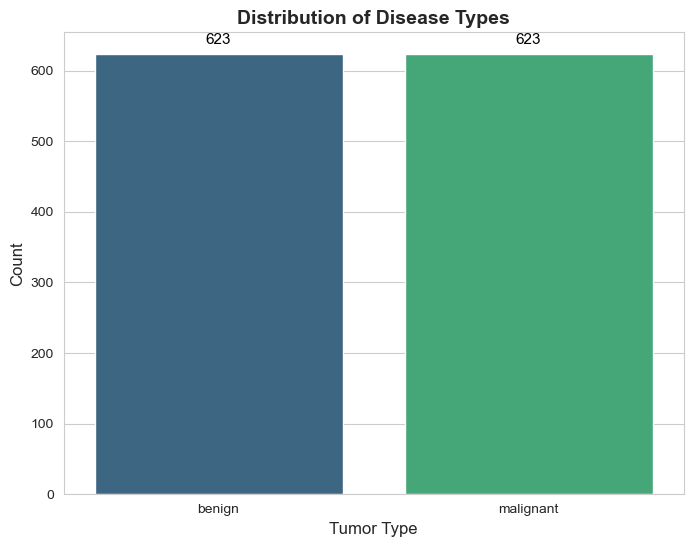

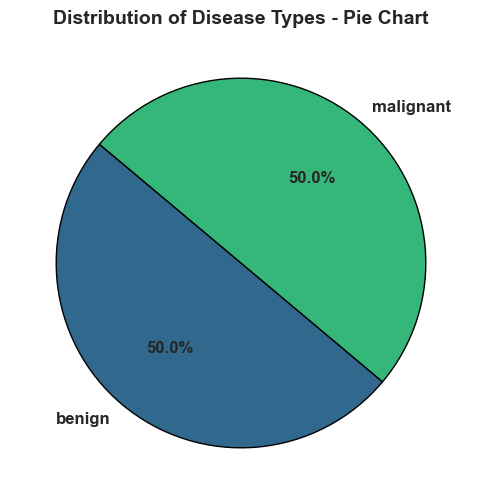

In [23]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df1, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution of Disease Types", fontsize=14,fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

label_counts = df1["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',startangle=140, colors=colors, textprops={'fontsize': 12,'weight': 'bold'},wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14,fontweight='bold')

plt.show()

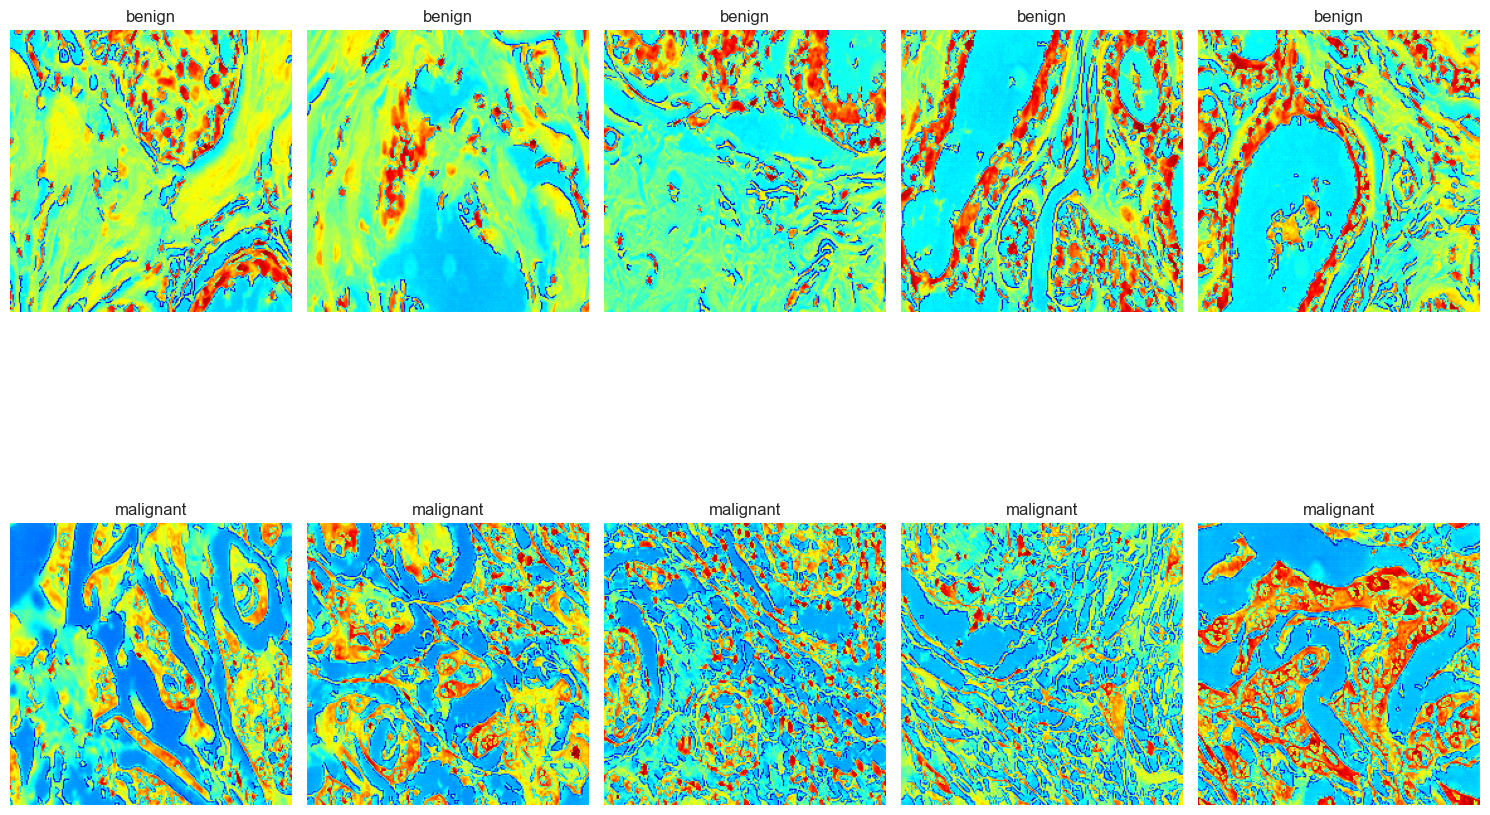

In [27]:
import cv2
import matplotlib.pyplot as plt

categories = df1['label'].unique()  # Ensure categories are defined
num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df1[df1['label'] == category]['image_path'].iloc[:num_images]
    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found or unreadable: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()


In [28]:
df2.shape

(806, 2)

In [29]:
df2.columns
df2.shape

(806, 2)

In [30]:
df2.columns
df2.duplicated().sum()

0

In [31]:
df2.isnull().sum()

image_path    0
label         0
dtype: int64

In [32]:
df2['label'].unique()
df2['label'].value_counts()

label
benign       406
malignant    400
Name: count, dtype: int64

C:\Users\adity\AppData\Local\Temp\ipykernel_23664\3749593416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x="label", palette="viridis", ax=ax)


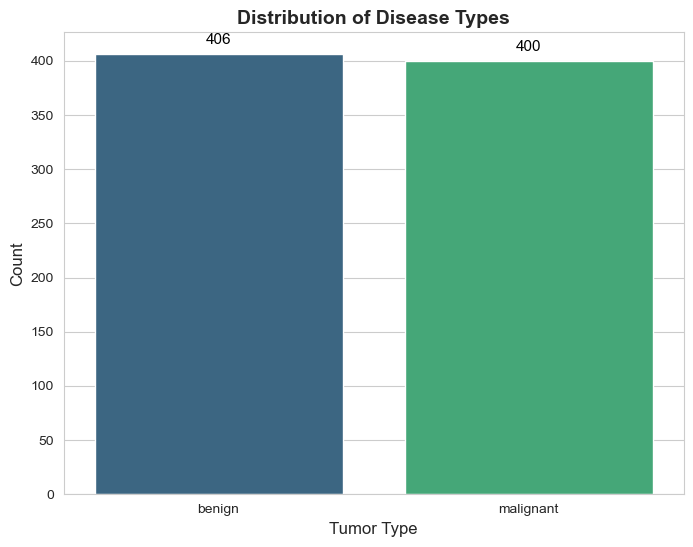

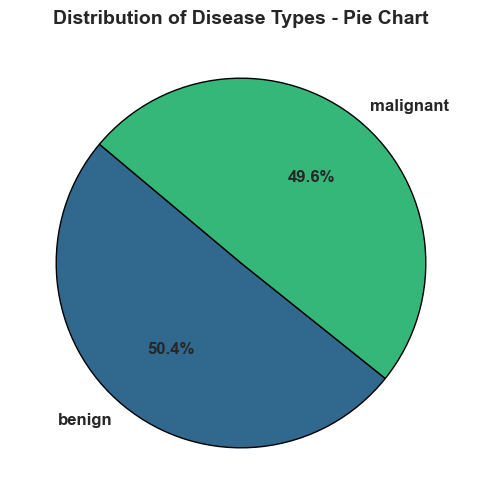

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df2, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Disease Types", fontsize=14,fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()
label_counts = df2["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',startangle=140, colors=colors, textprops={'fontsize': 12,'weight': 'bold'},wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14,fontweight='bold')
plt.show()

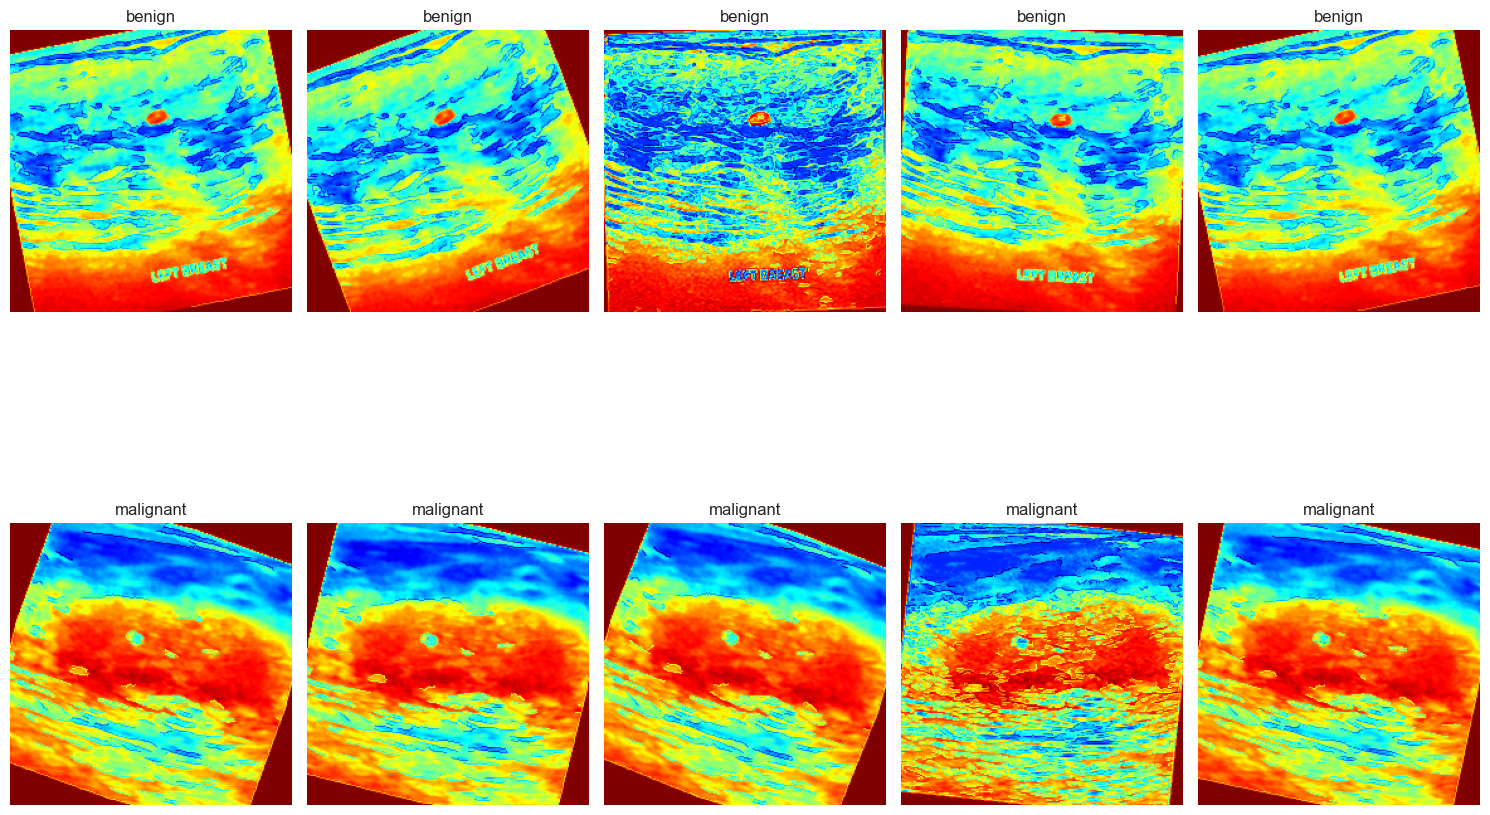

In [34]:
import cv2
import matplotlib.pyplot as plt

num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df2[df2['label'] == category]['image_path'].iloc[:num_images]
    
    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()
